# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [74]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp
%matplotlib inline

### Step 2: Read in your data set 

In [17]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations.  A few of the observations are not complete.

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [86]:
pd.crosstab(df_raw['admit'], df_raw['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE scores have a much wider range of possible outcomes compared to GPA, which is on a 4.0 scale.  Thus, it is impossible for GPA scores to have a variance beyond 4. As standard deviation is related to variance is also limited.

#### Question 4. Drop data points with missing data


In [50]:
df_no_missing = df_raw.dropna()
df_no_missing.count()



admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [51]:
df_no_missing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Confirm the missing results were dropped: (1) check count of the new dataframe to ensure that there are the same number of values for each observation, (2) run describe function to see if it is now possible to run all the summary statistics or if it is impossible due to missing data as before, or (3) visually inspect new dataframe.

#### Question 6. Create box plots for GRE and GPA

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11af2ea20>],
 'caps': [<matplotlib.lines.Line2D at 0x11af36c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x11af41c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11af3ccf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11af2ebe0>,
  <matplotlib.lines.Line2D at 0x11af36b70>]}

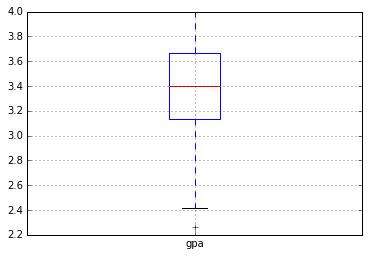

In [29]:
df_no_missing.boxplot(['gpa'])

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11adf2438>],
 'caps': [<matplotlib.lines.Line2D at 0x11adf8dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11adfff60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11adff748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11adf2e48>,
  <matplotlib.lines.Line2D at 0x11adf2f60>]}

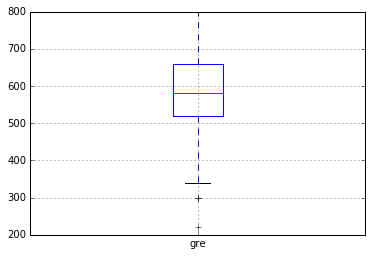

In [28]:
df_no_missing.boxplot(['gre'])

#### Question 7. What do this plots show?

Answer: Boxplots visually show much of the data from the summary statistic table above.  Specifically, the plots shows: maximum and minimum data points, the first and third quartiles (top and bottom of box), and the median (horizontal red line in middle of box).  Here, the boxplot shows that both GRE and GPA groups have very long whiskers and numerous outliers.  The whiskers, which end at the last non-outlier data points, are not evenly distributed in either box plot.  

#### Question 8. Describe each distribution 

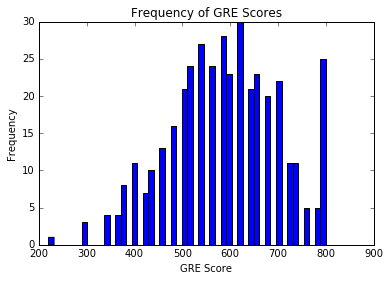

In [94]:
df_no_missing.gre.plot(kind='hist', bins=50, title='Frequency of GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')



In [93]:
df_no_missing.gre.value_counts()

620.0    30
580.0    28
540.0    27
800.0    25
520.0    24
560.0    24
600.0    23
660.0    23
700.0    22
640.0    21
500.0    21
680.0    20
480.0    16
460.0    13
720.0    11
400.0    11
740.0    11
440.0    10
380.0     8
420.0     7
780.0     5
760.0     5
340.0     4
360.0     4
300.0     3
220.0     1
Name: gre, dtype: int64

In [72]:
df_no_missing.gre.kurt()

-0.33286435465143427

In [70]:
df_no_missing.gre.skew()

-0.146046988215597

NameError: name 'sns' is not defined

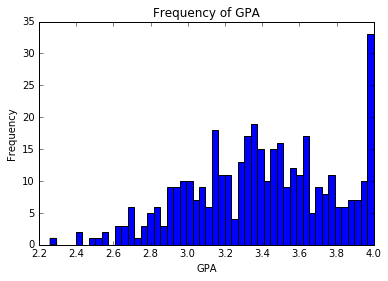

In [95]:
df_no_missing.gpa.plot(kind='hist', bins=50, title='Frequency of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
sns.plt.show()

In [ ]:
df_no_missing.gpa.plot(kind='hist', bins=50, title='Frequency of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
sns.plt.show()

In [71]:
df_no_missing.gpa.kurt()

-0.56356989952216807

In [69]:
df_no_missing.gpa.skew()

-0.21688893296924305

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e197d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2c4780>]], dtype=object)

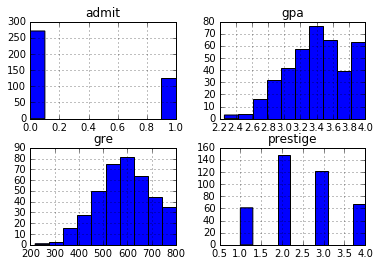

In [88]:
df_no_missing.hist()


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The data is not symmetrically distributed in a bell-shaped curve.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. GRE and GPA could be log transformed.


In [82]:
p=sp.stats.mstats.normaltest(df_no_missing.apply(lambda x:np.exp(x)), axis=0)
print(p)


NormaltestResult(statistic=masked_array(data = [2203.8207987194646 -- 34.48471945126692 71.74767215981947],
             mask = [False  True False False],
       fill_value = 1e+20)
, pvalue=array([  0.00000000e+00,   3.09267656e-02,   3.24891475e-08,
         2.63142469e-16]))


#### Question 11. Which of our variables are potentially colinear? 

In [31]:
df_no_missing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


GRE and GPA are potentially collinear as they are the two independent continuous variables.

#### Question 12. What did you find?

Answer: The two independent variables, GRE and GPA, are not collinear as the Pearson's correlation coefficient is 0.38.  Thus, they do not have an exact linear relationship (1.0).  

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: (1) Create a table of the frequency of prestige with each admit outcome;
(2) Create a new dataframe for prestige with three dummy variables;
(3) Join the new prestige dataframe to the dataframe (no missing variables) so that it replaces the prior prestige column.
(3) Calculate the odds ratios of admission given the prestige ranking.

#### Question 14. What is your hypothesis? 

Answer: The probability of admission to graduate school is associated with the prestige of an applicant's undergraduate institution.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data